## 0-Beginning

In [ ]:
!gdown https://drive.google.com/uc?id=1HLPqAnnzcyet7yjtKwAahu_2BwRfVyFb --fuzzy
!gdown  https://drive.google.com/file/d/1dcfTSRblztw-K-nvlHITlUc7H8MhxYZ9/view?usp=sharing --fuzzy
!gdown  https://drive.google.com/file/d/1Gk2dritbxwiv5wNixbJnl9PNWcuXX3-u/view?usp=sharing --fuzzy

Downloading...
From (original): https://drive.google.com/uc?id=1HLPqAnnzcyet7yjtKwAahu_2BwRfVyFb
From (redirected): https://drive.google.com/uc?id=1HLPqAnnzcyet7yjtKwAahu_2BwRfVyFb&confirm=t&uuid=29ac21fc-d5eb-4cc8-9f8d-62dfe6d56c1b
To: /content/diagnoses_icd.csv.gz
100% 33.6M/33.6M [00:01<00:00, 26.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dcfTSRblztw-K-nvlHITlUc7H8MhxYZ9
To: /content/discharge_detail.csv.gz
100% 789k/789k [00:00<00:00, 8.98MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Gk2dritbxwiv5wNixbJnl9PNWcuXX3-u
From (redirected): https://drive.google.com/uc?id=1Gk2dritbxwiv5wNixbJnl9PNWcuXX3-u&confirm=t&uuid=f38b4667-4d54-43ed-b744-4b4044c9dbd4
To: /content/discharge.csv.gz
100% 1.14G/1.14G [00:17<00:00, 65.8MB/s]


In [ ]:
import pandas as pd

# Read the compressed CSV file
df = pd.read_csv('diagnoses_icd.csv.gz', compression='gzip')
# Read the first 5000 rows of the compressed CSV file
df_note = pd.read_csv('discharge.csv.gz', compression='gzip', nrows=20000)
# Read the compressed CSV file
df_note_full = pd.read_csv('discharge.csv.gz', compression='gzip')

#discharge.csv
df.columns
df_note.columns


Index(['note_id', 'subject_id', 'hadm_id', 'note_type', 'note_seq',
       'charttime', 'storetime', 'text'],
      dtype='object')

Full dataset

In [ ]:
row_count = df_note_full.shape[0]

# Print the number of rows
print(f"Total number of rows: {row_count}")

Total number of rows: 331793


Reduce Full

In [ ]:
import random
import numpy as np

seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)

# Calculate 20% of the total number of rows
reduced_size = int(df_note.shape[0] * 1)

# Sample 20% of the rows randomly
df_note_reduced = df_note.sample(n=reduced_size, random_state=42)

# Display the number of rows in the reduced dataset
print(f"Reduced dataset size: {df_note_reduced.shape[0]} rows")

# Save the reduced dataset if needed
df_note_reduced.to_csv('discharge_reduced.csv.gz', index=False, compression='gzip')
df_note_reduced.head(1)

Reduced dataset size: 20000 rows


,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
10650,10332027-DS-16,10332027,27008884,DS,16,2184-05-17 00:00:00,2184-05-17 21:27:00,\nName: ___ Unit No: ___\n \nAd...


In [ ]:
df_note.to_csv('discharge_5000.csv.gz', index=False, compression='gzip')

In [ ]:
df_note = pd.read_csv('discharge_5000.csv.gz', compression='gzip')
df_note.head()

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-DS-21,10000032,22595853,DS,21,2180-05-07 00:00:00,2180-05-09 15:26:00,\nName: ___ Unit No: _...
1,10000032-DS-22,10000032,22841357,DS,22,2180-06-27 00:00:00,2180-07-01 10:15:00,\nName: ___ Unit No: _...
2,10000032-DS-23,10000032,29079034,DS,23,2180-07-25 00:00:00,2180-07-25 21:42:00,\nName: ___ Unit No: _...
3,10000032-DS-24,10000032,25742920,DS,24,2180-08-07 00:00:00,2180-08-10 05:43:00,\nName: ___ Unit No: _...
4,10000084-DS-17,10000084,23052089,DS,17,2160-11-25 00:00:00,2160-11-25 15:09:00,\nName: ___ Unit No: __...


In [ ]:
print(f"Reduced dataset size: {df_note_reduced.shape[0]} rows")

Reduced dataset size: 20000 rows


Preprocessing

In [ ]:
import string
import re
from nltk.corpus import stopwords
import nltk

# Make sure you have downloaded stopwords if using nltk
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_note = df_note_reduced

In [ ]:
import re
import string

# Function to clean text
def clean_text(text):
      # Remove everything before 'History of Present Illness'
    start = re.search(r'History of Present Illness:', text)
    if start:
        text = text[start.end():]

    # Remove everything after 'Physical Exam'
    end = re.search(r'Physical Exam', text)
    if end:
        text = text[:end.start()]

    # Make everything lowercase
    text = text.lower()

    # Remove newline characters
    text = text.replace("\n", " ")

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])


    return text.strip()

# Apply the function to the 'text' column in df_note
df_note['text'] = df_note['text'].apply(clean_text)

In [ ]:
# Filter data with icd_version = 9
df_filtered = df[df['icd_version'] == 9].copy()

# Merge icd_code into one row according to 'subject_id' and 'hadm_id'.
df_grouped = df_filtered.groupby(['subject_id', 'hadm_id'])['icd_code'].apply(lambda x: ','.join(x)).reset_index()

# Merge the merged icd_code data with df_note and add a 'text' column.
result_df = pd.merge(df_grouped, df_note[['hadm_id', 'text']], on='hadm_id', how='inner')

result_df.head()

,subject_id,hadm_id,icd_code,text
0,10000032,22595853,"5723,78959,5715,07070,496,29680,30981,V1582",hcv cirrhosis cb ascites hiv art ho ivdu copd ...
1,10000032,22841357,"07071,78959,2875,2761,496,5715,V08,3051",hiv haart copd hcv cirrhosis complicated ascit...
2,10000032,25742920,"07054,78959,V462,5715,2767,2761,496,V08,3051,7...",w hiv haart copd 3l home o2 though sating fine...
3,10000032,29079034,"45829,07044,7994,2761,78959,2767,3051,V08,V498...",mrs female hiv haart copd hcv cirrhosis compli...
4,10000248,20600184,"9222,920,E8854,E8495,2860,2859",mr history factor viii deficiency presents rig...


## ICD 9

In [ ]:
# Step 1: Process ICD-9 Diagnoses
# Filter the diagnoses to get only ICD-9 codes
icd_9_data = df[df['icd_version'] == 9]

# Group by icd_code to count occurrences and get top 10
icd_9_top10 = icd_9_data.groupby('icd_code').size().reset_index(name='count').nlargest(10, 'count')

# Extract top ICD-9 codes
top_icd_9_codes = icd_9_top10['icd_code'].unique()

top_icd_9_codes

array(['4019', '2724', '53081', '25000', '42731', '4280', '311', '41401',
       'V1582', '5849'], dtype=object)

In [ ]:
# Merge notes with diagnoses for ICD-9
merged_icd_9_data = pd.merge(df_note_reduced, icd_9_data, on=['subject_id', 'hadm_id'], how='inner')

In [ ]:
# Filter notes for top ICD-9 diagnoses
icd_9_notes = merged_icd_9_data[merged_icd_9_data['icd_code'].isin(top_icd_9_codes)][['subject_id', 'hadm_id', 'text', 'icd_code']]

SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming icd_9_notes is already loaded with columns: 'subject_id', 'hadm_id', 'text', 'icd_code'

# Splitting the DataFrame into 80% training and 20% testing
train_df_9, test_df_9 = train_test_split(icd_9_notes, test_size=0.2, random_state=42)

# Display the sizes of the split datasets
print("Training set size ICD_9:", train_df_9.shape[0])
print("Testing set size ICD_9:", test_df_9.shape[0])


Training set size ICD_9: 18741
Testing set size ICD_9: 4686


In [ ]:
train_df_9.head(100)

,subject_id,hadm_id,text,icd_code
92960,10253093,26543706,yo sp mechanical fall denies loc taken xray de...,53081
113505,10028306,25957523,yo w ho iddm htn hl presented ed dizziness vis...,4019
597,10394761,23737808,severe ckd pneumonia treated azithromycin cap ...,53081
89391,10417721,25493661,w critical aortic stenosis htn niddm prostateb...,25000
105783,10476303,22246038,yo ho poorly controlled htn dmii hld several h...,53081
...,...,...,...,...
113235,10364180,20397692,pcp hpi copd ckd dchf anemia chronic disease d...,5849
133189,10507163,22661528,yo cad medically managed multivessel disease d...,25000
116738,10378079,29545464,righthanded woman speaking history primary cns...,311
11439,10254215,23745070,year old white male sp cabgx4limalad rsvg om1 ...,4019


In [ ]:
test_df_9.head(100)

,subject_id,hadm_id,text,icd_code
28852,10343782,27524196,f w history recurrent utis afib recently disch...,2724
111644,10411182,23351593,yo ho chf ef 4045 echo atrial fibrillation cou...,311
19241,10558000,23815247,patient history multiple colon polyps underwen...,41401
27621,10115182,20281039,pmh hypertrophic cardiomyopathy afib warfarin ...,4019
51509,10614966,25401078,ho transferred ed confusion recent cough fever...,311
...,...,...,...,...
131466,10555626,24383347,upon interview patient quiet appears depressed...,4019
92360,10115631,29995334,female severalyear history midabdominal pain i...,V1582
54599,10088054,27066774,mr year old male presents rlq pain pain starte...,4019
83982,10098672,21229395,man whose pmh includes dm ii ckd stage iii fis...,5849


Group By

In [ ]:
# Step 1: Group ICD codes by 'hadm_id' in `train_df_9`
train_df_grouped = train_df_9.groupby(['hadm_id'])['icd_code'].apply(lambda x: ','.join(x)).reset_index()

# Step 2: Merge the grouped ICD codes with the notes from `train_df_9`
train_result_df = pd.merge(train_df_grouped, df_note[['hadm_id', 'text']], on='hadm_id', how='inner')

# Step 3: Clean the 'text' column in the merged train data
# Assuming you have a function `clean_text` defined for text preprocessing
train_result_df['text'] = train_result_df['text'].apply(clean_text)

# Display the first few rows of the final train DataFrame

train_df_9 = train_result_df
train_df_9.head()

,hadm_id,icd_code,text
0,20000019,"25000,5849,2724",history present illness ms year old speaking l...
1,20001956,4019,yo male alcoholic cirrhosis t2dm presented ed ...
2,20004004,"4280,41401",yo w cad asaplavix chf ef 40 mvr ptsd recent a...
3,20004408,"53081,4019",year old rhw chf htn asthma gerd transferred f...
4,20005465,4019,patient female co nausea vomiting epigastric a...


In [ ]:
# Step 1: Group ICD codes by 'hadm_id' in `test_df_9`
test_df_grouped = test_df_9.groupby(['hadm_id'])['icd_code'].apply(lambda x: ','.join(x)).reset_index()

# Step 2: Merge the grouped ICD codes with the notes from `test_df_9`
test_result_df = pd.merge(test_df_grouped, df_note[['hadm_id', 'text']], on='hadm_id', how='inner')

# Step 3: Clean the 'text' column in the merged train data
# Assuming you have a function `clean_text` defined for text preprocessing
test_result_df['text'] = test_result_df['text'].apply(clean_text)

# Display the first few rows of the final train DataFrame

test_df_9 = test_result_df
test_df_9.head()

,hadm_id,icd_code,text
0,20000019,4019,history present illness ms year old speaking l...
1,20001956,"25000,311",yo male alcoholic cirrhosis t2dm presented ed ...
2,20001984,5849,severe disease refractory immmunomodulating th...
3,20004408,4280,year old rhw chf htn asthma gerd transferred f...
4,20010003,2724,yo female pmhx polycystic disease sp bilateral...


In [ ]:
# # Step 2: Group ICD codes by 'hadm_id' in `test_df_10`
# test_df_grouped_10 = test_df_10.groupby(['hadm_id'])['icd_code'].apply(lambda x: ','.join(x)).reset_index()

# # Step 3: Merge the grouped ICD codes with the notes from `test_df_10`
# test_result_df_10 = pd.merge(test_df_grouped_10, df_note[['hadm_id', 'text']], on='hadm_id', how='inner')

# # Step 4: Clean the 'text' column in the merged test data
# # Assuming you have a function `clean_text` defined for text preprocessing
# test_result_df_10['text'] = test_result_df_10['text'].apply(clean_text)

# # Display the first few rows of the final test DataFrame
# test_df_10 = test_result_df_10
# test_df_10.head()

In [ ]:
pip install transformers

# BioBERT

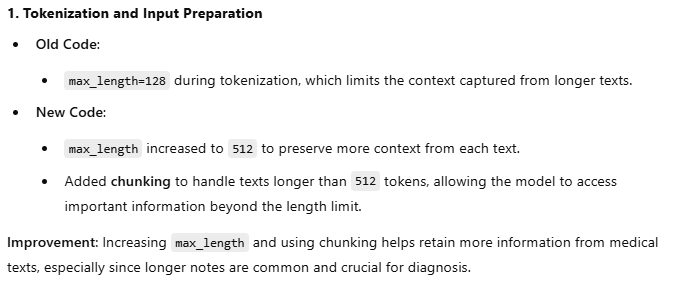

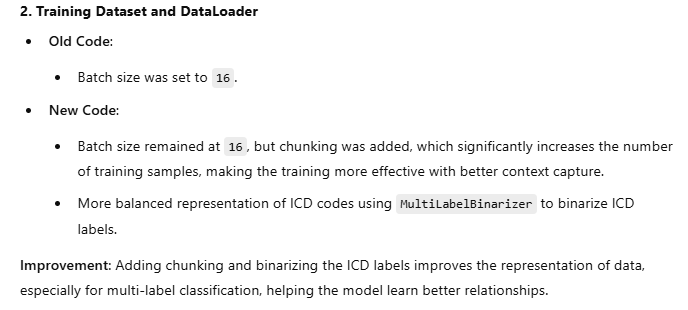

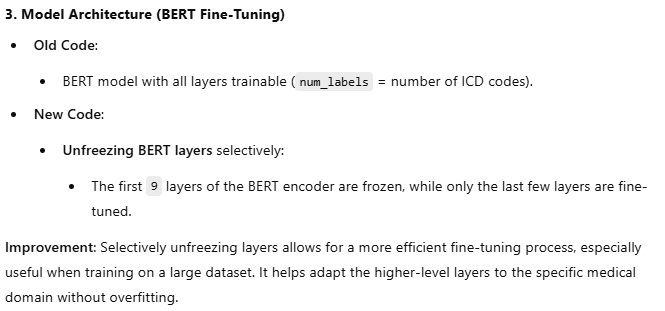

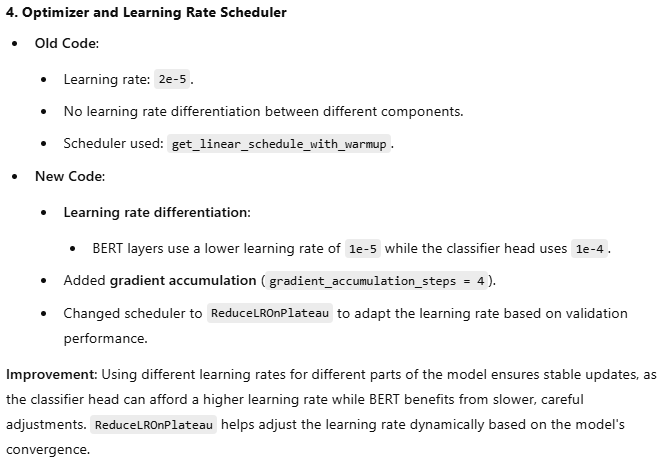

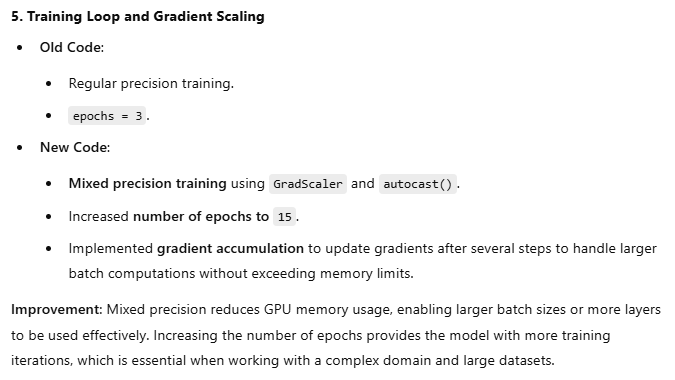

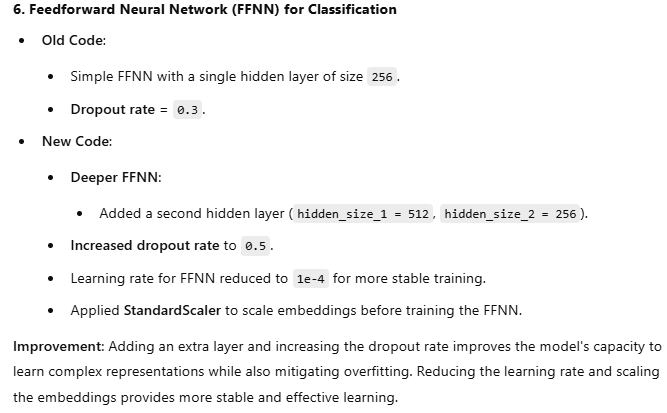

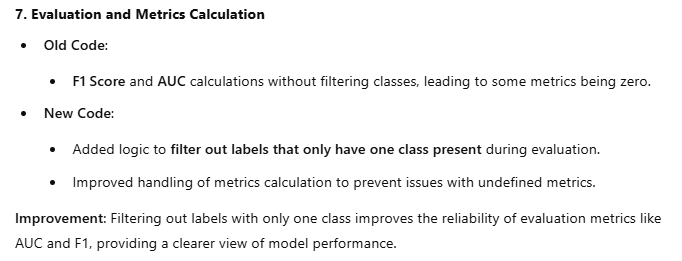

Summary of Changes to Improve Underfitting:

Tokenization:
Increased max_length to 512.
Added chunking to better handle longer medical notes.

BERT Fine-Tuning:
Selectively unfrozen layers for efficient domain adaptation.

Training Parameters:
Learning Rate Differentiation: Lower learning rate for BERT layers, higher for classifier head.
Introduced gradient accumulation and mixed precision training.
Increased number of epochs to 15.

Feedforward Neural Network:
Deeper architecture with two hidden layers.
Higher dropout rate (0.5).
Standardized embeddings before training.

Evaluation:
Improved metrics calculation by filtering out labels with only one class.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Split ICD codes into lists for binarization in both train and test datasets
train_df_9['icd_code'] = train_df_9['icd_code'].apply(lambda x: x.split(','))
test_df_9['icd_code'] = test_df_9['icd_code'].apply(lambda x: x.split(','))

# Step 2: Use MultiLabelBinarizer to encode ICD codes as binary columns for both datasets
mlb = MultiLabelBinarizer()
train_icd_binarized = mlb.fit_transform(train_df_9['icd_code'])
test_icd_binarized = mlb.transform(test_df_9['icd_code'])

# Step 3: Create DataFrames for binarized ICD codes for both train and test datasets
train_icd_binarized_df = pd.DataFrame(train_icd_binarized, columns=mlb.classes_)
test_icd_binarized_df = pd.DataFrame(test_icd_binarized, columns=mlb.classes_)

# Step 4: Add the binary ICD columns back to the original train and test DataFrames
train_df_9 = pd.concat([train_df_9.drop(columns=['icd_code']), train_icd_binarized_df], axis=1)
test_df_9 = pd.concat([test_df_9.drop(columns=['icd_code']), test_icd_binarized_df], axis=1)

# Verify the result
print("Updated train_df_9 DataFrame with binarized ICD codes:")
print(train_df_9.head())

print("\nUpdated test_df_9 DataFrame with binarized ICD codes:")
print(test_df_9.head())


Updated train_df_9 DataFrame with binarized ICD codes:
    hadm_id                                               text  25000  2724  \
0  20000019  history present illness ms year old speaking l...      1     1   
1  20001956  yo male alcoholic cirrhosis t2dm presented ed ...      0     0   
2  20004004  yo w cad asaplavix chf ef 40 mvr ptsd recent a...      0     0   
3  20004408  year old rhw chf htn asthma gerd transferred f...      0     0   
4  20005465  patient female co nausea vomiting epigastric a...      0     0   

   311  4019  41401  42731  4280  53081  5849  V1582  
0    0     0      0      0     0      0     1      0  
1    0     1      0      0     0      0     0      0  
2    0     0      1      0     1      0     0      0  
3    0     1      0      0     0      1     0      0  
4    0     1      0      0     0      0     0      0  

Updated test_df_9 DataFrame with binarized ICD codes:
    hadm_id                                               text  25000  2724  \
0  200

In [ ]:
import torch
from transformers import BertTokenizer

# Step 5: Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.1')

# Step 6: Function to tokenize text with chunking
def tokenize_texts_with_chunking(df, tokenizer, max_length=512):
    input_ids, attention_masks, chunk_hadm_ids = [], [], []

    for i, text in enumerate(df['text']):
        # Tokenize text into tokens
        tokens = tokenizer.tokenize(text)

        # Split tokens into chunks of max_length (512 tokens)
        num_chunks = len(tokens) // max_length + (1 if len(tokens) % max_length != 0 else 0)

        for chunk_idx in range(num_chunks):
            # Get the chunk of tokens
            chunk_tokens = tokens[chunk_idx * max_length: (chunk_idx + 1) * max_length]

            # Encode the chunk into input IDs and attention masks
            encoded = tokenizer.encode_plus(
                chunk_tokens,
                add_special_tokens=True,
                max_length=max_length,
                padding='max_length',
                truncation=True,
                return_attention_mask=True,
                return_tensors='pt'
            )
            input_ids.append(encoded['input_ids'])
            attention_masks.append(encoded['attention_mask'])
            chunk_hadm_ids.append(df['hadm_id'].iloc[i])  # Keep track of which text (HADM_ID) each chunk belongs to

    # Stack all tensors
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    chunk_hadm_ids = torch.tensor(chunk_hadm_ids, dtype=torch.long)

    return input_ids, attention_masks, chunk_hadm_ids

# Step 7: Tokenize training and testing data with chunking
train_input_ids, train_attention_masks, train_chunk_hadm_ids = tokenize_texts_with_chunking(train_df_9, tokenizer)
test_input_ids, test_attention_masks, test_chunk_hadm_ids = tokenize_texts_with_chunking(test_df_9, tokenizer)

# Verify the result by printing some examples
print("Sample Tokenized Input IDs:", train_input_ids[0])
print("Sample Attention Mask:", train_attention_masks[0])
print("Sample HADM_ID:", train_chunk_hadm_ids[0])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

Sample Tokenized Input IDs: tensor([  101,  1607,  1675,  6946,   182,  1116,  1214,  1385,  3522,  5141,
          173,  1306,  1477,   177,  1204,  1179, 17428,  5048, 11534,   190,
         3121,  5165, 23639,  2180, 14598,  1608, 20557, 12509,  2489,   181,
         1197, 10880,  1116, 11824,  1116,  7920,  1116, 22882, 26979,  1158,
        16320,   173,  6834, 19700,  5762,  2455, 11111,  1757, 17428,  5048,
         2786,  4267, 15284,  1757, 16320, 10880,  1276,   184,  1204,   190,
         3121, 15207,  1313,   192, 23639,  2180, 14598,  1261,  1464,  4146,
         2052,  1322, 18649,  1116, 10298, 19968,  5964,  1843,  5048,  3288,
         5016,  2489,  4850,  1495,  5311, 17576, 24239,  1479,  5306,  4208,
         1204,  2052,  3288,  9301,  1116,  2489,  7393,  1477,  5706, 13414,
        23435,  1407,  5306,   187,  1161,  2052,  5048,  2952, 12211,  2418,
        20557,  2616,  5909,  1566,  6766,  1233,  6341,  8886,  1757,  1218,
        10496, 28117, 20488, 16091, 

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Step 8: Define DataLoader for Training Data
batch_size = 16  # Increased to stabilize training
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_chunk_hadm_ids)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)



In [ ]:
from transformers import BertForSequenceClassification, AdamW

# Step 9: Load Pre-trained BERT Model for Classification
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(mlb.classes_),  # Number of ICD codes (multi-label classification)
    output_attentions=False,
    output_hidden_states=True  # To get embeddings for later use
)

# Move Model to GPU if Available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Step 10: Unfreeze last few layers of BERT for Fine-Tuning
for param in model.bert.encoder.layer[:9].parameters():  # Freeze the first 9 layers
    param.requires_grad = False
for param in model.bert.encoder.layer[9:].parameters():  # Unfreeze the rest of the layers
    param.requires_grad = True


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.cuda.amp import autocast, GradScaler

# Step 11: Define Optimizer and Learning Rate Scheduler
optimizer = AdamW([
    {'params': model.bert.parameters(), 'lr': 1e-5},
    {'params': model.classifier.parameters(), 'lr': 1e-4}
], lr=1e-5, eps=1e-8, weight_decay=0.01)

epochs = 15
total_steps = len(train_dataloader) * epochs
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)

# Step 12: Define Loss Function
criterion = torch.nn.BCEWithLogitsLoss()

# Initialize GradScaler for mixed precision training
scaler = GradScaler()

# Step 13: Training Loop with Mixed Precision Training and Gradient Accumulation
gradient_accumulation_steps = 4  # Number of steps to accumulate gradients before updating

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for step, batch in enumerate(train_dataloader):
        # Unpack the batch and move to GPU if available
        b_input_ids, b_attention_masks, b_hadm_ids = [item.to(device) for item in batch]

        # Get labels corresponding to the current HADM_ID
        b_labels = []
        for hadm_id in b_hadm_ids.cpu().numpy():
            label_row = train_df_9[train_df_9['hadm_id'] == hadm_id].iloc[:, 2:].values
            b_labels.append(label_row)

        b_labels = torch.tensor(np.vstack(b_labels), dtype=torch.float32).to(device)

        # Skip batch if there's a mismatch in batch size
        if b_input_ids.size(0) != b_labels.size(0):
            print(f"Skipping batch due to size mismatch: input size {b_input_ids.size(0)}, labels size {b_labels.size(0)}")
            continue

        # Forward pass with mixed precision training
        with autocast():
            outputs = model(
                input_ids=b_input_ids,
                attention_mask=b_attention_masks,
                labels=b_labels
            )

            # Calculate loss with gradient accumulation
            loss = outputs.loss / gradient_accumulation_steps

        # Scale the loss for mixed precision training
        scaler.scale(loss).backward()

        # Clip gradients to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # Update model parameters every `gradient_accumulation_steps` steps
        if (step + 1) % gradient_accumulation_steps == 0 or (step + 1) == len(train_dataloader):
            scaler.step(optimizer)
            scaler.update()
            model.zero_grad()

        # Accumulate loss
        total_loss += loss.item()

    # Compute average loss for epoch
    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}/{epochs} - Average Training Loss: {avg_train_loss:.4f}")

    # Step learning rate scheduler
    scheduler.step(avg_train_loss)




/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
<ipython-input-29-4fed382c8536>:18: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ipython-input-29-4fed382c8536>:45: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/15 - Average Training Loss: 0.1336
Epoch 2/15 - Average Training Loss: 0.1254
Epoch 3/15 - Average Training Loss: 0.1251
Epoch 4/15 - Average Training Loss: 0.1250
Epoch 5/15 - Average Training Loss: 0.1249
Epoch 6/15 - Average Training Loss: 0.1247
Epoch 7/15 - Average Training Loss: 0.1245
Epoch 8/15 - Average Training Loss: 0.1245
Epoch 9/15 - Average Training Loss: 0.1244
Epoch 10/15 - Average Training Loss: 0.1243
Epoch 11/15 - Average Training Loss: 0.1242
Epoch 12/15 - Average Training Loss: 0.1241
Epoch 13/15 - Average Training Loss: 0.1237
Epoch 14/15 - Average Training Loss: 0.1236
Epoch 15/15 - Average Training Loss: 0.1234


In [ ]:
# Assuming train_df_9 and test_df_9 are already defined and contain ICD columns
icd_columns = train_df_9.columns.difference(['hadm_id', 'text']).tolist()

# Step 14: Extract embeddings for the train and test dataset
def extract_embeddings(model, dataloader, device):
    model.eval()
    embeddings = []
    hadm_ids = []

    with torch.no_grad():
        for batch in dataloader:
            b_input_ids, b_attention_masks, b_hadm_ids = batch

            b_input_ids = b_input_ids.to(device)
            b_attention_masks = b_attention_masks.to(device)

            outputs = model(
                input_ids=b_input_ids,
                attention_mask=b_attention_masks
            )

            hidden_states = outputs.hidden_states[-2]
            pooled_embeddings = hidden_states.mean(dim=1)

            embeddings.append(pooled_embeddings.cpu().numpy())
            hadm_ids.extend(b_hadm_ids.numpy())

    embeddings = np.vstack(embeddings)
    return embeddings, hadm_ids

# Extract embeddings for train dataset
train_embeddings, train_hadm_ids = extract_embeddings(model, train_dataloader, device)

# Convert embeddings to DataFrame
train_embeddings_df = pd.DataFrame(train_embeddings)
train_embeddings_df['hadm_id'] = train_hadm_ids

# Merge embeddings with ICD codes for final DataFrame
train_final_df = pd.merge(train_embeddings_df, train_df_9[['hadm_id'] + icd_columns], on='hadm_id', how='inner')

# Step 15: Create DataLoader for test data
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_chunk_hadm_ids)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Extract embeddings for test dataset
test_embeddings, test_hadm_ids = extract_embeddings(model, test_dataloader, device)

# Convert embeddings to DataFrame
test_embeddings_df = pd.DataFrame(test_embeddings)
test_embeddings_df['hadm_id'] = test_hadm_ids

# Merge embeddings with ICD codes for final DataFrame
test_final_df = pd.merge(test_embeddings_df, test_df_9[['hadm_id'] + icd_columns], on='hadm_id', how='inner')



In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import torch.nn as nn

# Step 16: Convert train and test embeddings and labels to tensors

# Define the columns for embeddings - exclude hadm_id and ICD code columns
embedding_columns = [col for col in train_final_df.columns if col not in mlb.classes_ and col != 'hadm_id']

# Create tensors for embeddings and labels for training and testing
train_embeddings_tensor = torch.tensor(train_final_df[embedding_columns].values, dtype=torch.float32).to(device)
train_labels_tensor = torch.tensor(train_final_df[mlb.classes_].values, dtype=torch.float32).to(device)

test_embeddings_tensor = torch.tensor(test_final_df[embedding_columns].values, dtype=torch.float32).to(device)
test_labels_tensor = torch.tensor(test_final_df[mlb.classes_].values, dtype=torch.float32).to(device)

# Verify the shapes
print(f"Train Embeddings Tensor Shape: {train_embeddings_tensor.shape}")
print(f"Train Labels Tensor Shape: {train_labels_tensor.shape}")
print(f"Test Embeddings Tensor Shape: {test_embeddings_tensor.shape}")
print(f"Test Labels Tensor Shape: {test_labels_tensor.shape}")


# Step 17: Create datasets and dataloaders for FFNN
batch_size = 32  # Adjust based on GPU memory
train_dataset = TensorDataset(train_embeddings_tensor, train_labels_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(test_embeddings_tensor, test_labels_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Verify the shapes for a sample batch
sample_batch = next(iter(train_dataloader))
print(f"Sample Batch Embeddings Shape: {sample_batch[0].shape}")
print(f"Sample Batch Labels Shape: {sample_batch[1].shape}")





Train Embeddings Tensor Shape: torch.Size([10696, 768])
Train Labels Tensor Shape: torch.Size([10696, 10])
Test Embeddings Tensor Shape: torch.Size([4690, 768])
Test Labels Tensor Shape: torch.Size([4690, 10])
Sample Batch Embeddings Shape: torch.Size([32, 768])
Sample Batch Labels Shape: torch.Size([32, 10])


In [ ]:
# Step 18: Apply scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_embeddings_scaled = scaler.fit_transform(train_final_df[embedding_columns].values)
test_embeddings_scaled = scaler.transform(test_final_df[embedding_columns].values)

# Convert scaled embeddings to tensors
train_embeddings_tensor = torch.tensor(train_embeddings_scaled, dtype=torch.float32).to(device)
test_embeddings_tensor = torch.tensor(test_embeddings_scaled, dtype=torch.float32).to(device)

# Verify the shapes after scaling
print(f"Train Embeddings Tensor Shape After Scaling: {train_embeddings_tensor.shape}")
print(f"Test Embeddings Tensor Shape After Scaling: {test_embeddings_tensor.shape}")


Train Embeddings Tensor Shape After Scaling: torch.Size([10696, 768])
Test Embeddings Tensor Shape After Scaling: torch.Size([4690, 768])


In [ ]:
import torch.nn as nn

# Step 16: Define a more advanced Feedforward Neural Network (FFNN) for classification
# Using extracted embeddings (of size 768) and predicting ICD codes (the number of columns in icd_columns)
class FFNNClassifier(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, num_classes, dropout_rate=0.5):
        super(FFNNClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(hidden_size_2, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        return x

input_size = train_embeddings_tensor.shape[1]  # Use the correct input size based on the embedding tensor shape
ffnn_classifier = FFNNClassifier(input_size, hidden_size_1=512, hidden_size_2=256, num_classes=len(mlb.classes_)).to(device)




In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import torch.nn as nn


# Create datasets and dataloaders
train_dataset = TensorDataset(train_embeddings_tensor, train_labels_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(test_embeddings_tensor, test_labels_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Step 19: Define training parameters for FFNN
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy for multi-label classification
# Lower Learning Rate
optimizer = optim.Adam(ffnn_classifier.parameters(), lr=1e-4)  # Reduced learning rate

# Learning Rate Scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


# Step 20: Train the FFNN Classifier
epochs = 15

for epoch in range(epochs):
    ffnn_classifier.train()
    total_loss = 0

    for batch in train_dataloader:
        b_embeddings, b_labels = [item.to(device) for item in batch]

        optimizer.zero_grad()

        # Forward pass
        outputs = ffnn_classifier(b_embeddings)

        # Calculate loss
        loss = criterion(outputs, b_labels)
        total_loss += loss.item()

        # Backward pass and update weights
        loss.backward()
        optimizer.step()

    # Step the learning rate scheduler
    scheduler.step()

    # Compute average loss for epoch
    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}/{epochs} - Average Training Loss: {avg_train_loss:.4f}")




Epoch 1/15 - Average Training Loss: 0.5221
Epoch 2/15 - Average Training Loss: 0.4926
Epoch 3/15 - Average Training Loss: 0.4825
Epoch 4/15 - Average Training Loss: 0.4750
Epoch 5/15 - Average Training Loss: 0.4670
Epoch 6/15 - Average Training Loss: 0.4617
Epoch 7/15 - Average Training Loss: 0.4565
Epoch 8/15 - Average Training Loss: 0.4539
Epoch 9/15 - Average Training Loss: 0.4513
Epoch 10/15 - Average Training Loss: 0.4482
Epoch 11/15 - Average Training Loss: 0.4450
Epoch 12/15 - Average Training Loss: 0.4434
Epoch 13/15 - Average Training Loss: 0.4426
Epoch 14/15 - Average Training Loss: 0.4408
Epoch 15/15 - Average Training Loss: 0.4392


In [ ]:
print("Train Embeddings Tensor Shape:", train_embeddings_tensor.shape)


Train Embeddings Tensor Shape: torch.Size([10696, 768])


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Step 21: Evaluate the FFNN Classifier
def evaluate_ffnn(ffnn_model, dataloader):
    ffnn_model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    with torch.no_grad():
        for batch in dataloader:
            b_embeddings, b_labels = [item.to(device) for item in batch]

            # Forward pass
            logits = ffnn_model(b_embeddings)
            probs = torch.sigmoid(logits).cpu().numpy()  # Apply sigmoid activation to logits

            # Binarize predictions using a threshold of 0.5
            preds = (probs > 0.5).astype(int)

            # Collect predictions, true labels, and probabilities
            all_preds.append(preds)
            all_labels.append(b_labels.cpu().numpy())
            all_probs.append(probs)

    # Concatenate all batches
    all_preds = np.vstack(all_preds)
    all_labels = np.vstack(all_labels)
    all_probs = np.vstack(all_probs)

    # Filter out labels that only have one class present
    non_empty_classes = np.where(np.any(all_labels, axis=0) & np.any(1 - all_labels, axis=0))[0]
    all_labels = all_labels[:, non_empty_classes]
    all_preds = all_preds[:, non_empty_classes]
    all_probs = all_probs[:, non_empty_classes]

    # Calculate evaluation metrics
    try:
        f1_micro = f1_score(all_labels, all_preds, average='micro', zero_division=0)
        f1_macro = f1_score(all_labels, all_preds, average='macro', zero_division=0)
        auc_micro = roc_auc_score(all_labels, all_probs, average='micro')
        auc_macro = roc_auc_score(all_labels, all_probs, average='macro')
    except ValueError as e:
        print(f"Error calculating metrics: {e}")
        f1_micro = f1_macro = auc_micro = auc_macro = 0.0

    # Print the evaluation metrics
    print(f"F1 Micro: {f1_micro:.4f}")
    print(f"F1 Macro: {f1_macro:.4f}")
    print(f"AUC Micro: {auc_micro:.4f}")
    print(f"AUC Macro: {auc_macro:.4f}")

# Evaluate FFNN on test data
evaluate_ffnn(ffnn_classifier, test_dataloader)



F1 Micro: 0.2165
F1 Macro: 0.1356
AUC Micro: 0.6922
AUC Macro: 0.6471


In [ ]:
import numpy as np

def precision_at_k(y_true, y_scores, k=5):
    # Sort indices of scores to get the top-k highest for each sample
    top_k_indices = np.argsort(-y_scores, axis=1)[:, :k]  # Sort in descending order and take top k

    precisions = []
    for i in range(y_true.shape[0]):
        true_labels = set(np.where(y_true[i] > 0)[0])
        top_k_pred = set(top_k_indices[i])

        # Calculate precision at k for this instance
        if len(top_k_pred) == 0:
            precision = 0
        else:
            precision = len(true_labels.intersection(top_k_pred)) / k

        precisions.append(precision)

    return np.mean(precisions)


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Step 21: Evaluate the FFNN Classifier with Precision@5
def evaluate_ffnn(ffnn_model, dataloader):
    ffnn_model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    with torch.no_grad():
        for batch in dataloader:
            b_embeddings, b_labels = [item.to(device) for item in batch]

            # Forward pass
            logits = ffnn_model(b_embeddings)
            probs = torch.sigmoid(logits).cpu().numpy()  # Apply sigmoid activation to logits

            # Binarize predictions using a threshold of 0.5
            preds = (probs > 0.5).astype(int)

            # Collect predictions, true labels, and probabilities
            all_preds.append(preds)
            all_labels.append(b_labels.cpu().numpy())
            all_probs.append(probs)

    # Concatenate all batches
    all_preds = np.vstack(all_preds)
    all_labels = np.vstack(all_labels)
    all_probs = np.vstack(all_probs)

    # Filter out labels that only have one class present
    non_empty_classes = np.where(np.any(all_labels, axis=0) & np.any(1 - all_labels, axis=0))[0]
    all_labels = all_labels[:, non_empty_classes]
    all_preds = all_preds[:, non_empty_classes]
    all_probs = all_probs[:, non_empty_classes]

    # Calculate evaluation metrics
    try:
        f1_micro = f1_score(all_labels, all_preds, average='micro', zero_division=0)
        f1_macro = f1_score(all_labels, all_preds, average='macro', zero_division=0)
        auc_micro = roc_auc_score(all_labels, all_probs, average='micro')
        auc_macro = roc_auc_score(all_labels, all_probs, average='macro')
        precision_at_5_value = precision_at_k(all_labels, all_probs, k=5)
    except ValueError as e:
        print(f"Error calculating metrics: {e}")
        f1_micro = f1_macro = auc_micro = auc_macro = precision_at_5_value = 0.0

    # Print the evaluation metrics
    print(f"F1 Micro: {f1_micro:.4f}")
    print(f"F1 Macro: {f1_macro:.4f}")
    print(f"AUC Micro: {auc_micro:.4f}")
    print(f"AUC Macro: {auc_macro:.4f}")
    print(f"Precision@5: {precision_at_5_value:.4f}")

# Evaluate FFNN on test data
evaluate_ffnn(ffnn_classifier, test_dataloader)



F1 Micro: 0.2165
F1 Macro: 0.1356
AUC Micro: 0.6922
AUC Macro: 0.6471
Precision@5: 0.1801


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
import torch.nn.functional as F
import numpy as np
import pandas as pd

# Step 20: Train the FFNN Classifier and Evaluate for Each Epoch
epochs = 15
training_metrics = []
test_metrics = []

for epoch in range(epochs):
    ffnn_classifier.train()
    total_loss = 0

    # Training Loop
    for batch in train_dataloader:
        b_embeddings, b_labels = [item.to(device) for item in batch]

        optimizer.zero_grad()

        # Forward pass
        outputs = ffnn_classifier(b_embeddings)

        # Calculate loss
        loss = criterion(outputs, b_labels)
        total_loss += loss.item()

        # Backward pass and update weights
        loss.backward()
        optimizer.step()

    # Step the learning rate scheduler
    scheduler.step()

    # Compute average loss for epoch
    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}/{epochs} - Average Training Loss: {avg_train_loss:.4f}")

    # Evaluate FFNN on training and test data
    def evaluate_ffnn(ffnn_model, dataloader):
        ffnn_model.eval()
        all_labels = []
        all_preds = []
        all_probs = []

        with torch.no_grad():
            for batch in dataloader:
                b_embeddings, b_labels = [item.to(device) for item in batch]

                # Forward pass
                logits = ffnn_model(b_embeddings)
                probs = torch.sigmoid(logits).cpu().numpy()  # Apply sigmoid activation to logits

                # Binarize predictions using a threshold of 0.5
                preds = (probs > 0.5).astype(int)

                # Collect predictions, true labels, and probabilities
                all_preds.append(preds)
                all_labels.append(b_labels.cpu().numpy())
                all_probs.append(probs)

        # Concatenate all batches
        all_preds = np.vstack(all_preds)
        all_labels = np.vstack(all_labels)
        all_probs = np.vstack(all_probs)

        # Filter out labels that only have one class present
        non_empty_classes = np.where(np.any(all_labels, axis=0) & np.any(1 - all_labels, axis=0))[0]
        all_labels = all_labels[:, non_empty_classes]
        all_preds = all_preds[:, non_empty_classes]
        all_probs = all_probs[:, non_empty_classes]

        # Calculate evaluation metrics
        try:
            f1_micro = f1_score(all_labels, all_preds, average='micro', zero_division=0)
            f1_macro = f1_score(all_labels, all_preds, average='macro', zero_division=0)
            auc_micro = roc_auc_score(all_labels, all_probs, average='micro')
            auc_macro = roc_auc_score(all_labels, all_probs, average='macro')
            precision_at_5_value = precision_at_k(all_labels, all_probs, k=5)
        except ValueError as e:
            print(f"Error calculating metrics: {e}")
            f1_micro = f1_macro = auc_micro = auc_macro = precision_at_5_value = 0.0

        return {
            "F1 Micro": f1_micro,
            "F1 Macro": f1_macro,
            "AUC Micro": auc_micro,
            "AUC Macro": auc_macro,
            "Precision@5": precision_at_5_value
        }

    # Collect metrics for training data
    train_metrics = evaluate_ffnn(ffnn_classifier, train_dataloader)
    train_metrics['Epoch'] = epoch + 1
    training_metrics.append(train_metrics)

    # Collect metrics for test data
    test_metrics_epoch = evaluate_ffnn(ffnn_classifier, test_dataloader)
    test_metrics_epoch['Epoch'] = epoch + 1
    test_metrics.append(test_metrics_epoch)

# Convert training and test metrics to DataFrames
training_metrics_df = pd.DataFrame(training_metrics)
test_metrics_df = pd.DataFrame(test_metrics)

# Display summary of metrics
print("Training Metrics Summary:")
print(training_metrics_df)
print("\nTest Metrics Summary:")
print(test_metrics_df)



Epoch 1/15 - Average Training Loss: 0.4383
Epoch 2/15 - Average Training Loss: 0.4373
Epoch 3/15 - Average Training Loss: 0.4367
Epoch 4/15 - Average Training Loss: 0.4365
Epoch 5/15 - Average Training Loss: 0.4349
Epoch 6/15 - Average Training Loss: 0.4345
Epoch 7/15 - Average Training Loss: 0.4345
Epoch 8/15 - Average Training Loss: 0.4335
Epoch 9/15 - Average Training Loss: 0.4335
Epoch 10/15 - Average Training Loss: 0.4333
Epoch 11/15 - Average Training Loss: 0.4336
Epoch 12/15 - Average Training Loss: 0.4332
Epoch 13/15 - Average Training Loss: 0.4328
Epoch 14/15 - Average Training Loss: 0.4326
Epoch 15/15 - Average Training Loss: 0.4319
Training Metrics Summary:
    F1 Micro  F1 Macro  AUC Micro  AUC Macro  Precision@5  Epoch
0   0.326171  0.225484   0.795385   0.771786     0.339604      1
1   0.328946  0.227540   0.796475   0.772716     0.339678      2
2   0.328973  0.226708   0.797109   0.774035     0.340408      3
3   0.332883  0.229906   0.798407   0.775511     0.341268      

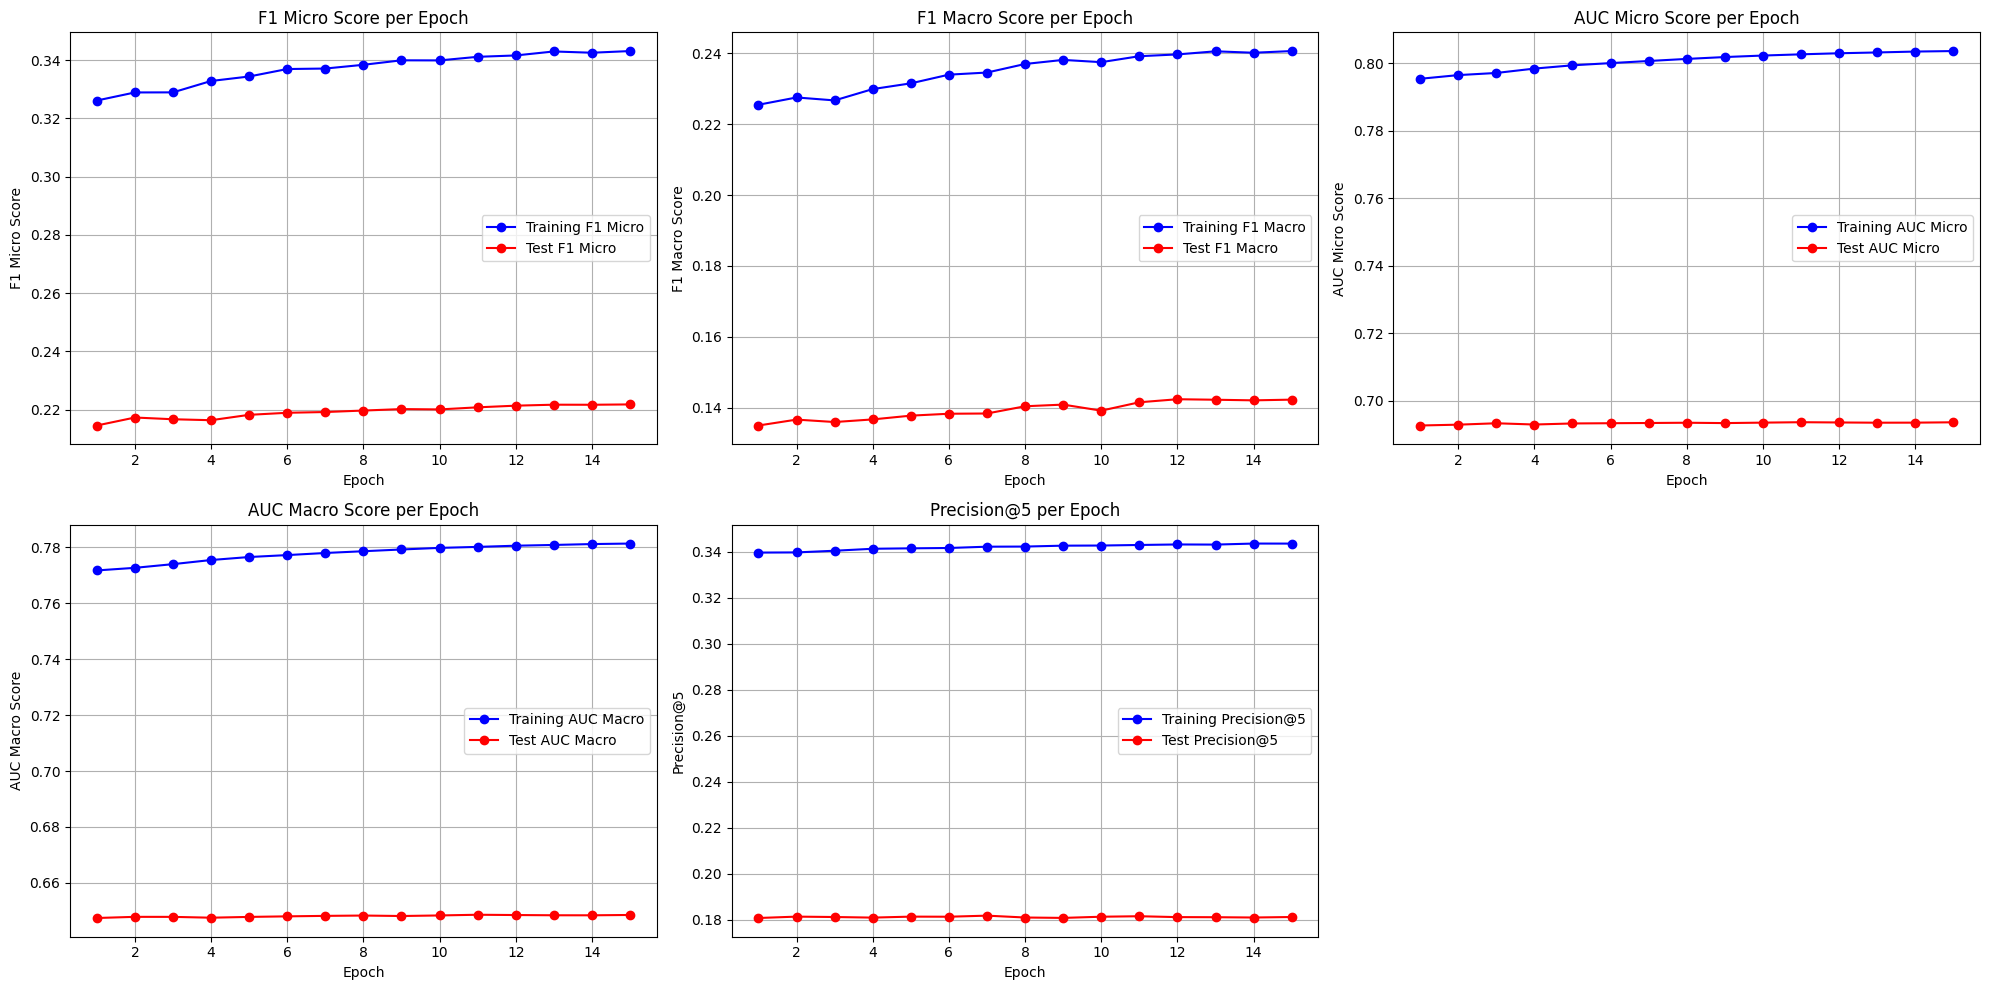

In [ ]:
import matplotlib.pyplot as plt

# Step 22: Plot Metrics for Training and Test per Epoch
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Plot F1 Micro Score for Training and Test
axes[0, 0].plot(training_metrics_df['Epoch'], training_metrics_df['F1 Micro'], label='Training F1 Micro', color='blue', marker='o')
axes[0, 0].plot(test_metrics_df['Epoch'], test_metrics_df['F1 Micro'], label='Test F1 Micro', color='red', marker='o')
axes[0, 0].set_title("F1 Micro Score per Epoch")
axes[0, 0].set_xlabel("Epoch")
axes[0, 0].set_ylabel("F1 Micro Score")
# axes[0, 0].set_ylim(0, 1)
axes[0, 0].legend()
axes[0, 0].grid()

# Plot F1 Macro Score for Training and Test
axes[0, 1].plot(training_metrics_df['Epoch'], training_metrics_df['F1 Macro'], label='Training F1 Macro', color='blue', marker='o')
axes[0, 1].plot(test_metrics_df['Epoch'], test_metrics_df['F1 Macro'], label='Test F1 Macro', color='red', marker='o')
axes[0, 1].set_title("F1 Macro Score per Epoch")
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].set_ylabel("F1 Macro Score")
# axes[0, 1].set_ylim(0, 1)
axes[0, 1].legend()
axes[0, 1].grid()

# Plot AUC Micro Score for Training and Test
axes[0, 2].plot(training_metrics_df['Epoch'], training_metrics_df['AUC Micro'], label='Training AUC Micro', color='blue', marker='o')
axes[0, 2].plot(test_metrics_df['Epoch'], test_metrics_df['AUC Micro'], label='Test AUC Micro', color='red', marker='o')
axes[0, 2].set_title("AUC Micro Score per Epoch")
axes[0, 2].set_xlabel("Epoch")
axes[0, 2].set_ylabel("AUC Micro Score")
# axes[0, 2].set_ylim(0, 1)
axes[0, 2].legend()
axes[0, 2].grid()

# Plot AUC Macro Score for Training and Test
axes[1, 0].plot(training_metrics_df['Epoch'], training_metrics_df['AUC Macro'], label='Training AUC Macro', color='blue', marker='o')
axes[1, 0].plot(test_metrics_df['Epoch'], test_metrics_df['AUC Macro'], label='Test AUC Macro', color='red', marker='o')
axes[1, 0].set_title("AUC Macro Score per Epoch")
axes[1, 0].set_xlabel("Epoch")
axes[1, 0].set_ylabel("AUC Macro Score")
# axes[1, 0].set_ylim(0, 1)
axes[1, 0].legend()
axes[1, 0].grid()

# Plot Precision@5 for Training and Test
axes[1, 1].plot(training_metrics_df['Epoch'], training_metrics_df['Precision@5'], label='Training Precision@5', color='blue', marker='o')
axes[1, 1].plot(test_metrics_df['Epoch'], test_metrics_df['Precision@5'], label='Test Precision@5', color='red', marker='o')
axes[1, 1].set_title("Precision@5 per Epoch")
axes[1, 1].set_xlabel("Epoch")
axes[1, 1].set_ylabel("Precision@5")
# axes[1, 1].set_ylim(0, 1)
axes[1, 1].legend()
axes[1, 1].grid()

# Remove the unused subplot
fig.delaxes(axes[1, 2])

# Adjust layout for better appearance
plt.tight_layout()

# Show the combined figure
plt.show()




In [ ]:
import torch
import numpy as np

# Step 6.1: Define a Function to Make Predictions Using the FFNN Classifier with Probabilities
def make_predictions_using_embeddings(model, embeddings_df, test_result_df, mlb, num_samples=5, threshold=0.2):
    model.eval()  # Set model to evaluation mode
    all_preds = []

    # Extract embeddings and corresponding HADM_ID from DataFrame
    embedding_columns = [col for col in embeddings_df.columns if col not in mlb.classes_ and col != 'hadm_id']
    embeddings = embeddings_df[embedding_columns].values  # Extract embedding columns
    hadm_ids = embeddings_df['hadm_id'].values

    # Make sure num_samples does not exceed the available number of samples
    num_samples = min(num_samples, len(hadm_ids))

    # Select a subset of samples to predict (up to the number specified)
    sample_indices = np.random.choice(len(hadm_ids), num_samples, replace=False)
    selected_embeddings = embeddings[sample_indices]
    selected_hadm_ids = hadm_ids[sample_indices]

    # Extract actual ICD codes from binary columns
    icd_columns = [col for col in embeddings_df.columns if col in mlb.classes_]
    actual_icd_codes_list = []
    selected_texts = []

    for hadm_id in selected_hadm_ids:
        # Extract actual ICD codes from binary columns
        idx = np.where(hadm_ids == hadm_id)[0][0]
        binary_values = embeddings_df.iloc[idx][icd_columns].values
        actual_icd_codes = [icd for icd, val in zip(icd_columns, binary_values) if val == 1]
        actual_icd_codes_list.append(actual_icd_codes)

        # Extract text corresponding to the selected HADM_ID by joining with test_result_df
        text_row = test_result_df[test_result_df['hadm_id'] == hadm_id]
        text = text_row['text'].values[0] if not text_row.empty else "Text not found"
        selected_texts.append(text)

    with torch.no_grad():  # Disable gradients for evaluation
        # Convert embeddings to tensor and move to GPU if available
        input_embeddings = torch.tensor(selected_embeddings, dtype=torch.float32).to(device)

        # Forward pass through the FFNN classifier
        logits = model(input_embeddings)
        probs = torch.sigmoid(logits).cpu().numpy()  # Apply sigmoid activation to logits

        # Binarize predictions using the threshold
        preds = (probs > threshold).astype(int)

        # Decode ICD codes using the MultiLabelBinarizer
        predicted_icd_codes = mlb.inverse_transform(preds)

        # Print the predictions for each sample, including the predicted probabilities
        for i in range(num_samples):
            print("--------------------------------------------------")
            print(f"Sample Number: {i + 1}")
            print(f"HADM_ID: {selected_hadm_ids[i]}")
            print(f"Text: {selected_texts[i]}")
            print(f"Actual ICD Codes: {', '.join(actual_icd_codes_list[i]) if actual_icd_codes_list[i] else 'None'}")
            print(f"Predicted ICD Codes: {', '.join(predicted_icd_codes[i]) if predicted_icd_codes[i] else 'None'}")
            print("Predicted Probabilities for Each ICD Code:")
            for code, prob in zip(mlb.classes_, probs[i]):
                print(f"  {code}: {prob:.4f}")
            print("--------------------------------------------------")

# Step 6.2: Make Predictions Using the FFNN Classifier and Test Embeddings
make_predictions_using_embeddings(ffnn_classifier, test_final_df, test_result_df, mlb, num_samples=20)


--------------------------------------------------
Sample Number: 1
HADM_ID: 25314125
Text: pmh htn hld cad systolic dysfunction ef 4045 transferred drop hct mid 30s 224 ct scan 35cm aaa left iliac aneurysm 49cm pt blood draw found hct 224 30s 352 reports last hct check year ago last recorded hct system 352 sent pcp aneurysm 35 cm area colonic wall thickening proximal acending colon concerning cancer pt denied bloody black stool however guiac positive ekg sr rate 83 prolonged pr borderline st depression diffusely ventricular trigeminy per report pt co fatigue lightheadedness otherwise feels usual cut dose lisinopril half attributed lightheadedness upon standing lisinopril reports hasnt colonoscopy interested one age checks stools daily seen blood dark stools family history notable mother colon cancer intial vitals 970 84 9664 16 98 labs notable hct 227 low mcv mchc mch high rdw inr 12 cr13 baseline 16 patient evaluated vascular surgery recommend urgent interventions transfusion one uni